<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code> 4 </code><b>

<b>Group Members:</b>  

1. <code>Riasat_B00974221</code>
2. <code>Mahsa_B00954491</code>
3. <code>Dorsa_B00965859</code>
4. <code>Lovelyn_B00926199</code>


# 1. Dataset Information 

<h4> Dataset Name: <code> pop.csv</code></h4>
<h4> Link to the Dataset: <code>https://www.census.gov/data/tables/time-series/demo/popest/2020s-counties-detail.html</code> </h4>
<h4> Dataset Description: This dataset features data containing county population estimates by demographic characteristics for years 2020 to 2022 For the United States. This dataset is is collected by the Census Beauru of the United States and containes data for all counties in all States and Territories of the United states. This dataset contains 12577 datapoints </h4>
<code> Provide short description of the dataset here </code>

# 2. Task Information 

<h4> Task Goal: <code> Predict the best places to move into given user preferences </code></h4>
<h4> Task Description: </h4>
    <code>This research introduces a specialized system designed to help both new immigrants and existing citizens of the United States be suggest the best states to move into. This is done by taking several user preferences regarding factors such as  income, cost of living, preferred weather, and preferred demographics etc. This approach ensures multiple facets are considered in regards to choosing the best states for each individual user.</code>

# 3. Task Implementation: Coding

### 3.1 Preprocessing 

#### 3.1.1 Original Dataset

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset
import torch

In [2]:
df_pop = pd.read_csv('pop.csv')
df_pop

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,50,1,1,Alabama,Autauga County,1,58802,28761,30041,3443,...,1055,1165,501,664,955,345,610,39.2,37.9,40.3
1,50,1,1,Alabama,Autauga County,2,58902,28819,30083,3457,...,1064,1170,501,669,958,350,608,39.1,37.9,40.3
2,50,1,1,Alabama,Autauga County,3,59210,28851,30359,3416,...,1074,1190,492,698,972,362,610,39.2,38.0,40.3
3,50,1,1,Alabama,Autauga County,4,59759,29105,30654,3460,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
4,50,1,3,Alabama,Baldwin County,1,231761,113388,118373,12046,...,4861,5601,2542,3059,4610,1812,2798,43.7,42.5,44.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12571,50,56,43,Wyoming,Washakie County,4,7719,3973,3746,378,...,187,250,125,125,212,73,139,44.8,43.3,46.6
12572,50,56,45,Wyoming,Weston County,1,6840,3724,3116,308,...,109,175,70,105,191,73,118,43.5,42.7,44.8
12573,50,56,45,Wyoming,Weston County,2,6818,3724,3094,310,...,110,171,70,101,193,73,120,43.5,42.6,44.8
12574,50,56,45,Wyoming,Weston County,3,6766,3729,3037,302,...,115,151,66,85,184,69,115,43.9,43.1,45.3


In [3]:
df_pop = df_pop[df_pop['YEAR'] == 4]
df_pop

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,50,1,1,Alabama,Autauga County,4,59759,29105,30654,3460,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
7,50,1,3,Alabama,Baldwin County,4,246435,120164,126271,12470,...,5709,6113,2811,3302,4933,1967,2966,44.1,42.9,45.3
11,50,1,5,Alabama,Barbour County,4,24706,13064,11642,1307,...,621,599,250,349,526,166,360,41.5,39.3,44.7
15,50,1,7,Alabama,Bibb County,4,22005,11775,10230,1159,...,460,508,229,279,418,122,296,40.9,39.1,43.6
19,50,1,9,Alabama,Blount County,4,59512,29583,29929,3414,...,1307,1328,563,765,1222,467,755,41.2,40.4,42.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,50,56,37,Wyoming,Sweetwater County,4,41345,21469,19876,2319,...,503,590,287,303,498,174,324,37.7,37.8,37.6
12563,50,56,39,Wyoming,Teton County,4,23287,12206,11081,1069,...,394,395,183,212,356,147,209,41.0,41.0,41.1
12567,50,56,41,Wyoming,Uinta County,4,20712,10598,10114,1226,...,255,316,147,169,277,104,173,38.0,38.1,37.9
12571,50,56,43,Wyoming,Washakie County,4,7719,3973,3746,378,...,187,250,125,125,212,73,139,44.8,43.3,46.6


We only take values for the 4th and latest years demographics as this is the most relavent for our research

In [4]:
df_pop = df_pop.drop(columns=['SUMLEV', 'YEAR', 'COUNTY', 'STATE'])
df_pop = df_pop.rename(columns={'STNAME':'state', 'CTYNAME':'county'})
df_pop

,state,county,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,UNDER5_MALE,UNDER5_FEM,AGE513_TOT,AGE513_MALE,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,Alabama,Autauga County,59759,29105,30654,3460,1797,1663,7021,3612,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
7,Alabama,Baldwin County,246435,120164,126271,12470,6427,6043,25992,13286,...,5709,6113,2811,3302,4933,1967,2966,44.1,42.9,45.3
11,Alabama,Barbour County,24706,13064,11642,1307,662,645,2446,1201,...,621,599,250,349,526,166,360,41.5,39.3,44.7
15,Alabama,Bibb County,22005,11775,10230,1159,576,583,2135,1100,...,460,508,229,279,418,122,296,40.9,39.1,43.6
19,Alabama,Blount County,59512,29583,29929,3414,1750,1664,6769,3459,...,1307,1328,563,765,1222,467,755,41.2,40.4,42.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,Wyoming,Sweetwater County,41345,21469,19876,2319,1194,1125,5255,2749,...,503,590,287,303,498,174,324,37.7,37.8,37.6
12563,Wyoming,Teton County,23287,12206,11081,1069,545,524,1966,981,...,394,395,183,212,356,147,209,41.0,41.0,41.1
12567,Wyoming,Uinta County,20712,10598,10114,1226,601,625,2908,1514,...,255,316,147,169,277,104,173,38.0,38.1,37.9
12571,Wyoming,Washakie County,7719,3973,3746,378,207,171,762,399,...,187,250,125,125,212,73,139,44.8,43.3,46.6


In [5]:
df_pop['UNDER18_MALE'] = df_pop['UNDER5_MALE'] + df_pop['AGE513_MALE']+df_pop['AGE1417_MALE']
df_pop['UNDER18_FEM'] = df_pop['UNDER5_FEM'] + df_pop['AGE513_FEM']+df_pop['AGE1417_FEM']

df_pop['AGE1864_MALE'] = df_pop['AGE1824_MALE'] + df_pop['AGE2529_MALE']+df_pop['AGE3034_MALE']+df_pop['AGE3539_MALE']+df_pop['AGE4044_MALE']+df_pop['AGE4549_MALE']+df_pop['AGE5054_MALE']+df_pop['AGE5559_MALE']+df_pop['AGE6064_MALE']
df_pop['AGE1864_FEM'] = df_pop['AGE1824_FEM'] + df_pop['AGE2529_FEM']+df_pop['AGE3034_FEM']+df_pop['AGE3539_FEM']+df_pop['AGE4044_FEM']+df_pop['AGE4549_FEM']+df_pop['AGE5054_FEM']+df_pop['AGE5559_FEM']+df_pop['AGE6064_FEM']

df_pop['AGE65PLUS_MALE'] = df_pop['AGE6569_MALE'] + df_pop['AGE7074_MALE']+df_pop['AGE7579_MALE']+df_pop['AGE8084_MALE']+df_pop['AGE85PLUS_MALE']
df_pop['AGE65PLUS_FEM'] = df_pop['AGE6569_FEM'] + df_pop['AGE7074_FEM']+df_pop['AGE7579_FEM']+df_pop['AGE8084_FEM']+df_pop['AGE85PLUS_FEM']

df_pop = df_pop[['state', 'county', 'POPEST_MALE', 'POPEST_FEM','UNDER18_MALE', 'UNDER18_FEM',  'AGE1864_MALE', 'AGE1864_FEM', 'AGE65PLUS_MALE', 'AGE65PLUS_FEM',  'MEDIAN_AGE_MALE', 'MEDIAN_AGE_FEM']]
df_pop

,state,county,POPEST_MALE,POPEST_FEM,UNDER18_MALE,UNDER18_FEM,AGE1864_MALE,AGE1864_FEM,AGE65PLUS_MALE,AGE65PLUS_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,Alabama,Autauga County,29105,30654,7129,6752,17704,18367,4272,5535,38.0,40.4
7,Alabama,Baldwin County,120164,126271,26168,25100,69055,72072,24941,29099,42.9,45.3
11,Alabama,Barbour County,13064,11642,2512,2519,8353,6227,2199,2896,39.3,44.7
15,Alabama,Bibb County,11775,10230,2234,2111,7819,5923,1722,2196,39.1,43.6
19,Alabama,Blount County,29583,29929,6835,6677,17610,17029,5138,6223,40.4,42.1
...,...,...,...,...,...,...,...,...,...,...,...,...
12559,Wyoming,Sweetwater County,21469,19876,5296,4932,13048,11895,3125,3049,37.8,37.6
12563,Wyoming,Teton County,12206,11081,2034,1955,8068,7134,2104,1992,41.0,41.1
12567,Wyoming,Uinta County,10598,10114,2845,2714,5977,5697,1776,1703,38.1,37.9
12571,Wyoming,Washakie County,3973,3746,869,735,2222,2054,882,957,43.3,46.6


We group all the distinct age groups together into three groups: Children under 18, Working adults from 18 to 64 and Seniors from Age 65 and up. This is done so that we can get population data for all relevant age groups together for an easier analysis. 

We only take the values of the columns state', 'county', 'POPEST_MALE', 'POPEST_FEM','UNDER18_MALE', 'UNDER18_FEM',  'AGE1864_MALE', 'AGE1864_FEM', 'AGE65PLUS_MALE', 'AGE65PLUS_FEM',  'MEDIAN_AGE_MALE' and  'MEDIAN_AGE_FEM'. This is done because the original population dataset has too many features for each group that might lead to unnecessary increased complexity for our model. These chosen columns contain the total population and Median ages for both sexes in all relevant age groups, which manage to capture most of the information with significant reduced number of features.

In [6]:
df= df_pop.copy()
df

,state,county,POPEST_MALE,POPEST_FEM,UNDER18_MALE,UNDER18_FEM,AGE1864_MALE,AGE1864_FEM,AGE65PLUS_MALE,AGE65PLUS_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,Alabama,Autauga County,29105,30654,7129,6752,17704,18367,4272,5535,38.0,40.4
7,Alabama,Baldwin County,120164,126271,26168,25100,69055,72072,24941,29099,42.9,45.3
11,Alabama,Barbour County,13064,11642,2512,2519,8353,6227,2199,2896,39.3,44.7
15,Alabama,Bibb County,11775,10230,2234,2111,7819,5923,1722,2196,39.1,43.6
19,Alabama,Blount County,29583,29929,6835,6677,17610,17029,5138,6223,40.4,42.1
...,...,...,...,...,...,...,...,...,...,...,...,...
12559,Wyoming,Sweetwater County,21469,19876,5296,4932,13048,11895,3125,3049,37.8,37.6
12563,Wyoming,Teton County,12206,11081,2034,1955,8068,7134,2104,1992,41.0,41.1
12567,Wyoming,Uinta County,10598,10114,2845,2714,5977,5697,1776,1703,38.1,37.9
12571,Wyoming,Washakie County,3973,3746,869,735,2222,2054,882,957,43.3,46.6


In [7]:
label_s = np.unique(df['state'])
label_c = np.unique(df['county'])

We now get the number of unique states and counties to get the total number of classes for each

#### 3.1.4 Class Imbalance and Oversampling

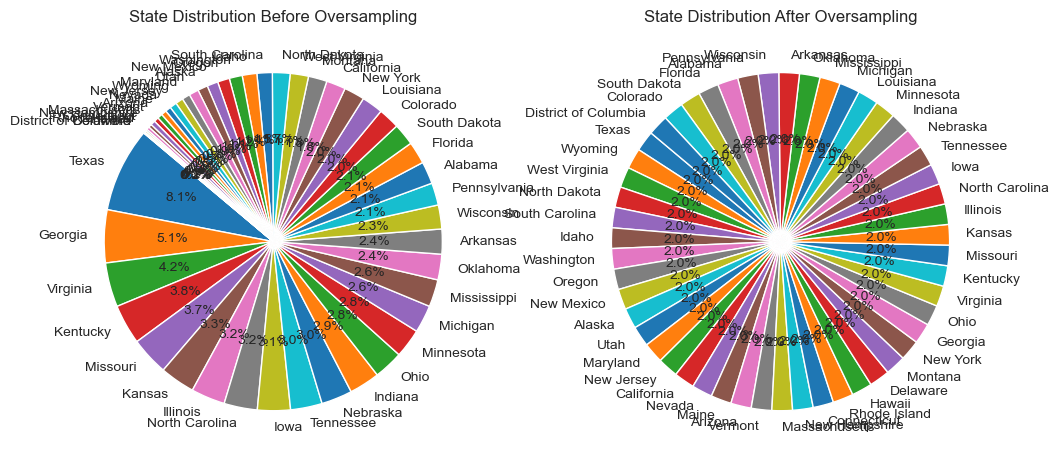

In [8]:
class_counts_before = df['state'].value_counts()
max_class_count = df['state'].value_counts().max()

oversampled_data = []
for class_label, count in df['state'].value_counts().items():
    class_data = df[df['state'] == class_label]
    oversampled_data.append(class_data.sample(max_class_count, replace=True))

df = pd.concat(oversampled_data)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(class_counts_before, labels=class_counts_before.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('State Distribution Before Oversampling')

axs[1].pie(df['state'].value_counts(), labels= df['state'].value_counts().index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('State Distribution After Oversampling')

plt.show()

We now account for data imbalance by oversampling the dataset to equalize the number of datapoints for each state. We show a pie chart of the class distribution of states before and after oversampling. 

#### 3.1.5 Data Encoding and Shuffling 

In [9]:
encoder = LabelEncoder()
df['state'] = encoder.fit_transform(df['state'])
df['county'] = encoder.fit_transform(df['county'])
df

,state,county,POPEST_MALE,POPEST_FEM,UNDER18_MALE,UNDER18_FEM,AGE1864_MALE,AGE1864_FEM,AGE65PLUS_MALE,AGE65PLUS_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
10639,43,839,124,109,32,30,65,57,27,22,44.7,40.5
10567,43,752,10286,9929,2551,2421,5972,5644,1763,1864,38.6,39.1
11079,43,1703,10996,9147,2384,2407,7302,5117,1310,1623,32.4,35.2
10611,43,815,8880,5956,1610,1436,6349,3357,921,1163,34.1,37.9
11107,43,1751,8988,8974,2153,2083,5134,4898,1701,1993,39.8,41.8
...,...,...,...,...,...,...,...,...,...,...,...,...
1287,8,466,319682,352121,63302,61173,220455,239613,35925,51335,34.8,34.9
1287,8,466,319682,352121,63302,61173,220455,239613,35925,51335,34.8,34.9
1287,8,466,319682,352121,63302,61173,220455,239613,35925,51335,34.8,34.9
1287,8,466,319682,352121,63302,61173,220455,239613,35925,51335,34.8,34.9


In [10]:
df = df.apply(pd.to_numeric)
df

,state,county,POPEST_MALE,POPEST_FEM,UNDER18_MALE,UNDER18_FEM,AGE1864_MALE,AGE1864_FEM,AGE65PLUS_MALE,AGE65PLUS_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
10639,43,839,124,109,32,30,65,57,27,22,44.7,40.5
10567,43,752,10286,9929,2551,2421,5972,5644,1763,1864,38.6,39.1
11079,43,1703,10996,9147,2384,2407,7302,5117,1310,1623,32.4,35.2
10611,43,815,8880,5956,1610,1436,6349,3357,921,1163,34.1,37.9
11107,43,1751,8988,8974,2153,2083,5134,4898,1701,1993,39.8,41.8
...,...,...,...,...,...,...,...,...,...,...,...,...
1287,8,466,319682,352121,63302,61173,220455,239613,35925,51335,34.8,34.9
1287,8,466,319682,352121,63302,61173,220455,239613,35925,51335,34.8,34.9
1287,8,466,319682,352121,63302,61173,220455,239613,35925,51335,34.8,34.9
1287,8,466,319682,352121,63302,61173,220455,239613,35925,51335,34.8,34.9


In [11]:
df.isnull().sum()

state              0
county             0
POPEST_MALE        0
POPEST_FEM         0
UNDER18_MALE       0
UNDER18_FEM        0
AGE1864_MALE       0
AGE1864_FEM        0
AGE65PLUS_MALE     0
AGE65PLUS_FEM      0
MEDIAN_AGE_MALE    0
MEDIAN_AGE_FEM     0
dtype: int64

In [12]:
df = df.sample(frac=1).reset_index(drop=True)
df

,state,county,POPEST_MALE,POPEST_FEM,UNDER18_MALE,UNDER18_FEM,AGE1864_MALE,AGE1864_FEM,AGE65PLUS_MALE,AGE65PLUS_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,25,653,4852,4986,1257,1203,2621,2581,974,1202,38.8,41.7
1,12,90,44918,44599,11439,10940,27045,26386,6434,7273,34.5,35.8
2,20,1533,18091,19841,3573,3264,9410,10101,5108,6476,48.6,53.4
3,28,746,8965,8307,2337,2255,5247,4663,1381,1389,36.9,36.3
4,2,972,2268611,2282913,521016,498220,1414639,1380119,332956,404574,36.5,38.5
...,...,...,...,...,...,...,...,...,...,...,...,...
12949,48,1252,4176,3410,764,664,2738,1965,674,781,41.6,46.5
12950,49,109,8464,8144,1401,1328,4500,4253,2563,2563,53.8,54.6
12951,27,174,881,860,153,169,463,405,265,286,51.8,54.4
12952,38,333,40643,37261,7312,6918,25392,21034,7939,9309,43.7,47.5


We now finalize our data preprocessing with the following steps:

1. Check for any null values that might exist in the dataset.
2. Use Label Encoding to encode all categorical data to numeric data to be more freely usable to ML and Deep Learning Models.
3. Change Types of all columns in the dataset to be numeric in case some columns do not have the correct type despite all of them being numerical data.
4. We shuffle the dataset so that no model can find any patterns from the arrangement of the data 

#### 3.1.6 X Subset Preprocessing


In [13]:
df_x = df.drop(columns=['state', 'county'])
df_x = df_x.astype('float64')
df_x

,POPEST_MALE,POPEST_FEM,UNDER18_MALE,UNDER18_FEM,AGE1864_MALE,AGE1864_FEM,AGE65PLUS_MALE,AGE65PLUS_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,4852.0,4986.0,1257.0,1203.0,2621.0,2581.0,974.0,1202.0,38.8,41.7
1,44918.0,44599.0,11439.0,10940.0,27045.0,26386.0,6434.0,7273.0,34.5,35.8
2,18091.0,19841.0,3573.0,3264.0,9410.0,10101.0,5108.0,6476.0,48.6,53.4
3,8965.0,8307.0,2337.0,2255.0,5247.0,4663.0,1381.0,1389.0,36.9,36.3
4,2268611.0,2282913.0,521016.0,498220.0,1414639.0,1380119.0,332956.0,404574.0,36.5,38.5
...,...,...,...,...,...,...,...,...,...,...
12949,4176.0,3410.0,764.0,664.0,2738.0,1965.0,674.0,781.0,41.6,46.5
12950,8464.0,8144.0,1401.0,1328.0,4500.0,4253.0,2563.0,2563.0,53.8,54.6
12951,881.0,860.0,153.0,169.0,463.0,405.0,265.0,286.0,51.8,54.4
12952,40643.0,37261.0,7312.0,6918.0,25392.0,21034.0,7939.0,9309.0,43.7,47.5


In [14]:
df_x_cols = df_x.columns
scaler = StandardScaler()
df_x = scaler.fit_transform(df_x)
df_x

array([[-0.383232  , -0.38477306, -0.37393616, ..., -0.4089367 ,
        -0.40678627, -0.25673747],
       [-0.16876242, -0.17706925, -0.1238944 , ..., -0.23021567,
        -1.19995093, -1.29625756],
       [-0.31236486, -0.30688347, -0.3170616 , ..., -0.25367814,
         1.40089133,  1.80468373],
       ...,
       [-0.40448839, -0.40640701, -0.40104735, ..., -0.43590235,
         1.9911534 ,  1.98087358],
       [-0.1916461 , -0.21554476, -0.2252421 , ..., -0.17027892,
         0.49705253,  0.76516364],
       [-0.33472931, -0.33422741, -0.32396219, ..., -0.34225854,
         0.25725856,  0.30707004]])

In [15]:
df_x = df_x - df_x.min().min()
df_x

array([[3.71444411, 3.71290305, 3.72373995, ..., 3.68873941, 3.69088984,
        3.84093864],
       [3.92891369, 3.92060687, 3.97378171, ..., 3.86746044, 2.89772518,
        2.80141855],
       [3.78531125, 3.79079264, 3.78061451, ..., 3.84399797, 5.49856744,
        5.90235984],
       ...,
       [3.69318772, 3.6912691 , 3.69662877, ..., 3.66177376, 6.08882952,
        6.07854969],
       [3.90603001, 3.88213135, 3.87243401, ..., 3.92739719, 4.59472864,
        4.86283975],
       [3.76294681, 3.7634487 , 3.77371392, ..., 3.75541757, 4.35493468,
        4.40474615]])

We separate out all labels from the original dataframe and put in into a new dataframe. Then wo do the following transformations to the new Dataset:

1. We convert all columns to float64. This is done so that all columns in the dataframe share a type to make future transformations easier.
2. We scale the data using a Standard Scaler. This is done because most of the columns contains data that are not on similar scales, which might lead to errors for several machine learning algorithms.
3. We then shift the scaled values to only contain positive values. This is done by subtracting the lowest negative value from all datapoints. This way, the lowest value in the dataframe becomes 0, thereby placing all other datapoints on the positive scales. This is done because some algorithms like Naive Bayes work best on positive values. 

#### 3.1.7 Y Subset Preprocessing

In [16]:
df_y = df[['state', 'county']]
df_y = df_y.astype('int64')
df_y

,state,county
0,25,653
1,12,90
2,20,1533
3,28,746
4,2,972
...,...,...
12949,48,1252
12950,49,109
12951,27,174
12952,38,333


We then seperate out the labels into their own dataframe. Note that since we are only predicting states, we only use the states columns for all predictions.

#### 3.1.8 Train Test Split

In [17]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(df_x, df_y, test_size=0.33, random_state=42, stratify=df_y['state'])
x_train_s

array([[3.83144261, 3.82482706, 3.854409  , ..., 3.78329582, 3.54332432,
        3.45332098],
       [3.88497168, 3.88129242, 3.89063092, ..., 3.9120303 , 4.3180433 ,
        4.24617529],
       [3.74341405, 3.74057208, 3.74336118, ..., 3.72618516, 4.90830537,
        4.59855498],
       ...,
       [3.84646286, 3.84993734, 3.80539276, ..., 3.8582462 , 3.93068381,
        3.48855895],
       [4.15416938, 4.15668231, 4.06319461, ..., 4.27736188, 4.6685114 ,
        4.79236381],
       [3.75794719, 3.75503841, 3.77101263, ..., 3.72512538, 3.59866139,
        3.38284504]])

#### 3.1.9 Tensor Dataset and Dataloader for Pytorch

In [18]:
x_train_sr = torch.FloatTensor(x_train_s)
x_test_sr = torch.FloatTensor(x_test_s)
x_train_sr

tensor([[3.8314, 3.8248, 3.8544,  ..., 3.7833, 3.5433, 3.4533],
        [3.8850, 3.8813, 3.8906,  ..., 3.9120, 4.3180, 4.2462],
        [3.7434, 3.7406, 3.7434,  ..., 3.7262, 4.9083, 4.5986],
        ...,
        [3.8465, 3.8499, 3.8054,  ..., 3.8582, 3.9307, 3.4886],
        [4.1542, 4.1567, 4.0632,  ..., 4.2774, 4.6685, 4.7924],
        [3.7579, 3.7550, 3.7710,  ..., 3.7251, 3.5987, 3.3828]])

In [19]:
y_train_sr = torch.LongTensor(y_train_s['state'].values)
y_test_sr = torch.LongTensor(y_test_s['state'].values)
y_train_sr

tensor([13, 11, 48,  ..., 32,  6,  3])

In [20]:
n_states = len(np.unique(df_y['state']))
n_states

51

In [21]:
input_dim = df_x.shape[1]
input_dim

10

In [22]:
train_db_s = TensorDataset(x_train_sr, y_train_sr)
data_loader_s = DataLoader(train_db_s, batch_size=n_states, shuffle=False)

We then split the x and y dataframes into train test sets to be used by the models. These sets are then turned into tensors for use in our custom neural network.

#### 3.1.10 Exploratory Data Analysis


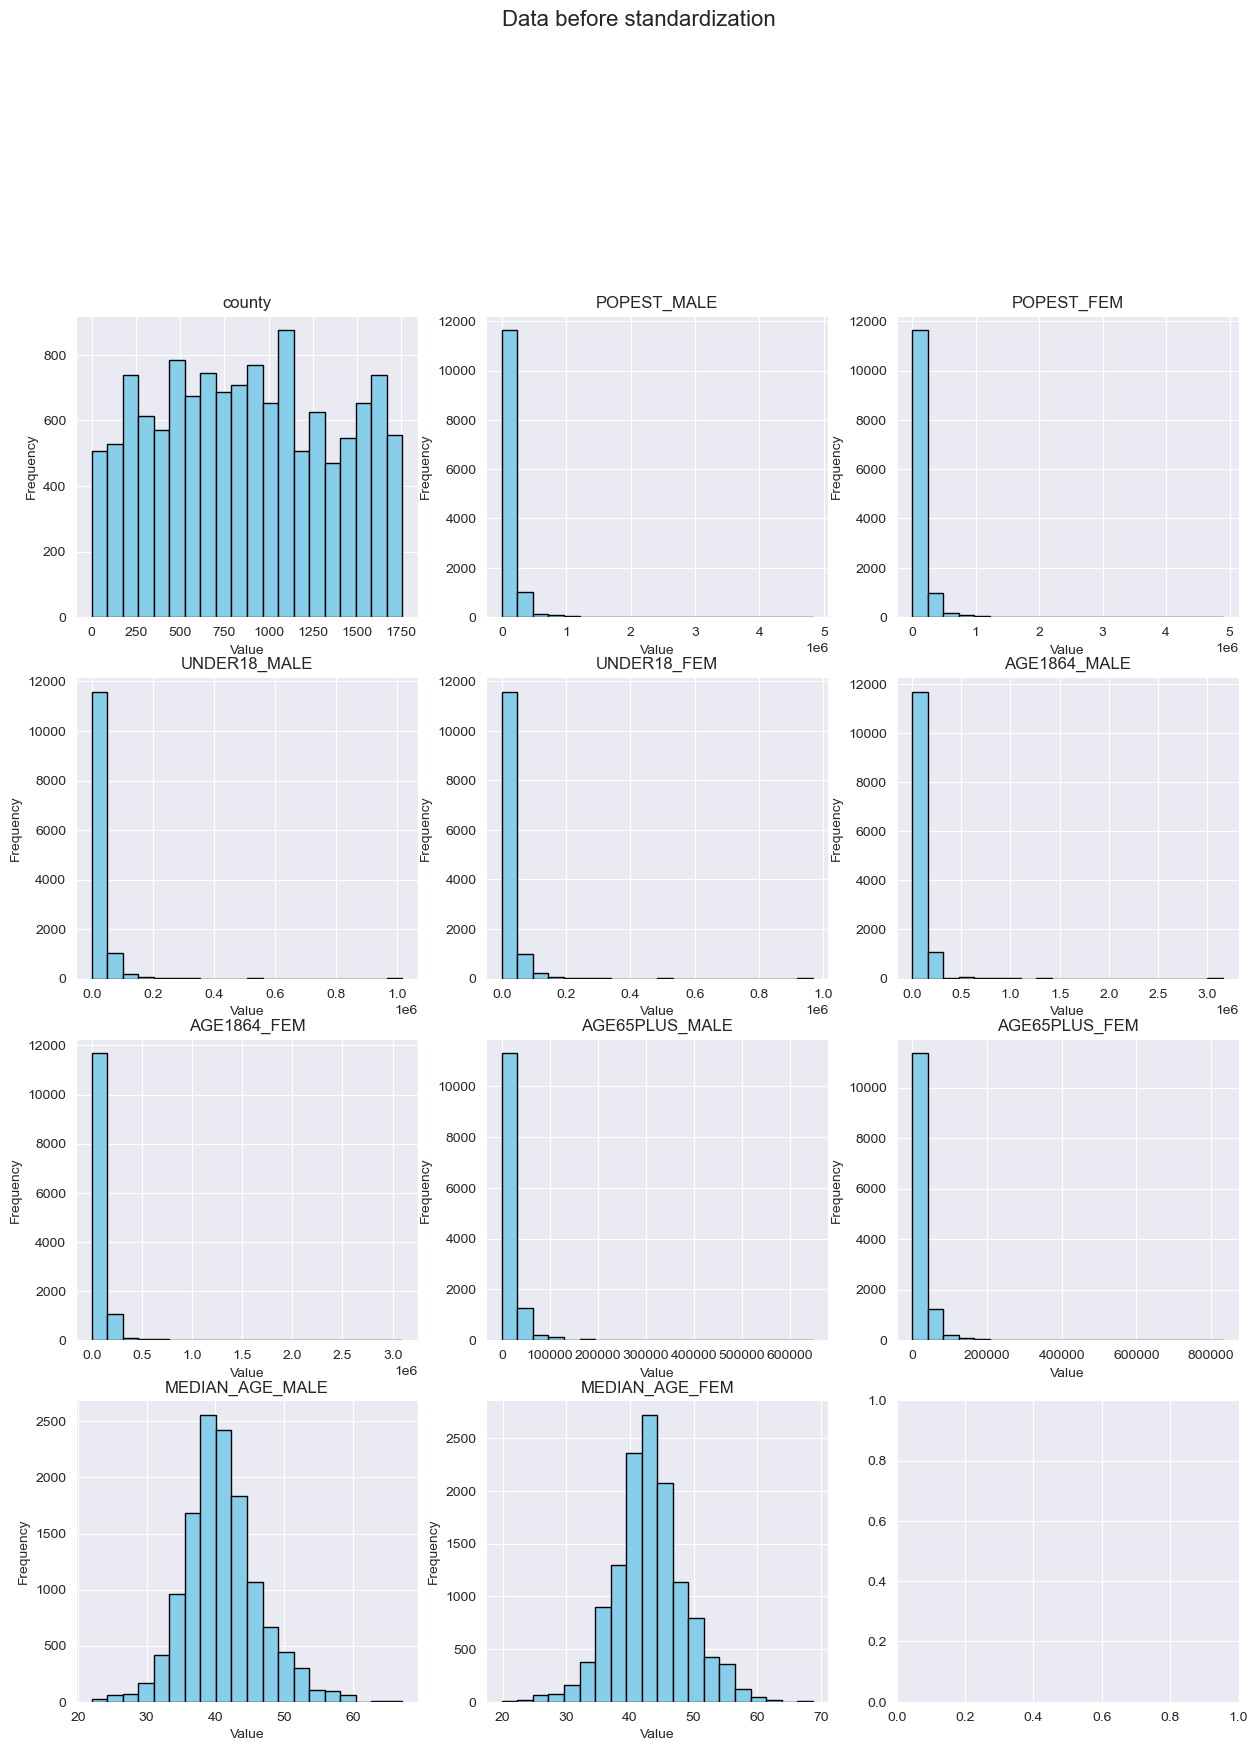

In [23]:
temp = df.copy()
temp = temp.drop(columns=['state'])

cols_to_drop = temp.columns[(temp.nunique() < 10)]
temp = temp.drop(columns=cols_to_drop)

fig, axes = plt.subplots(nrows=int(np.ceil(len(temp.columns) / 3)), ncols=3, figsize=(15, 18))

axes = axes.flatten()
for i, col in enumerate(temp.columns):
    axes[i].hist(temp[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.suptitle('Data before standardization', y=1.05, fontsize=16)


plt.savefig('graph/before_standard.png')
plt.show()

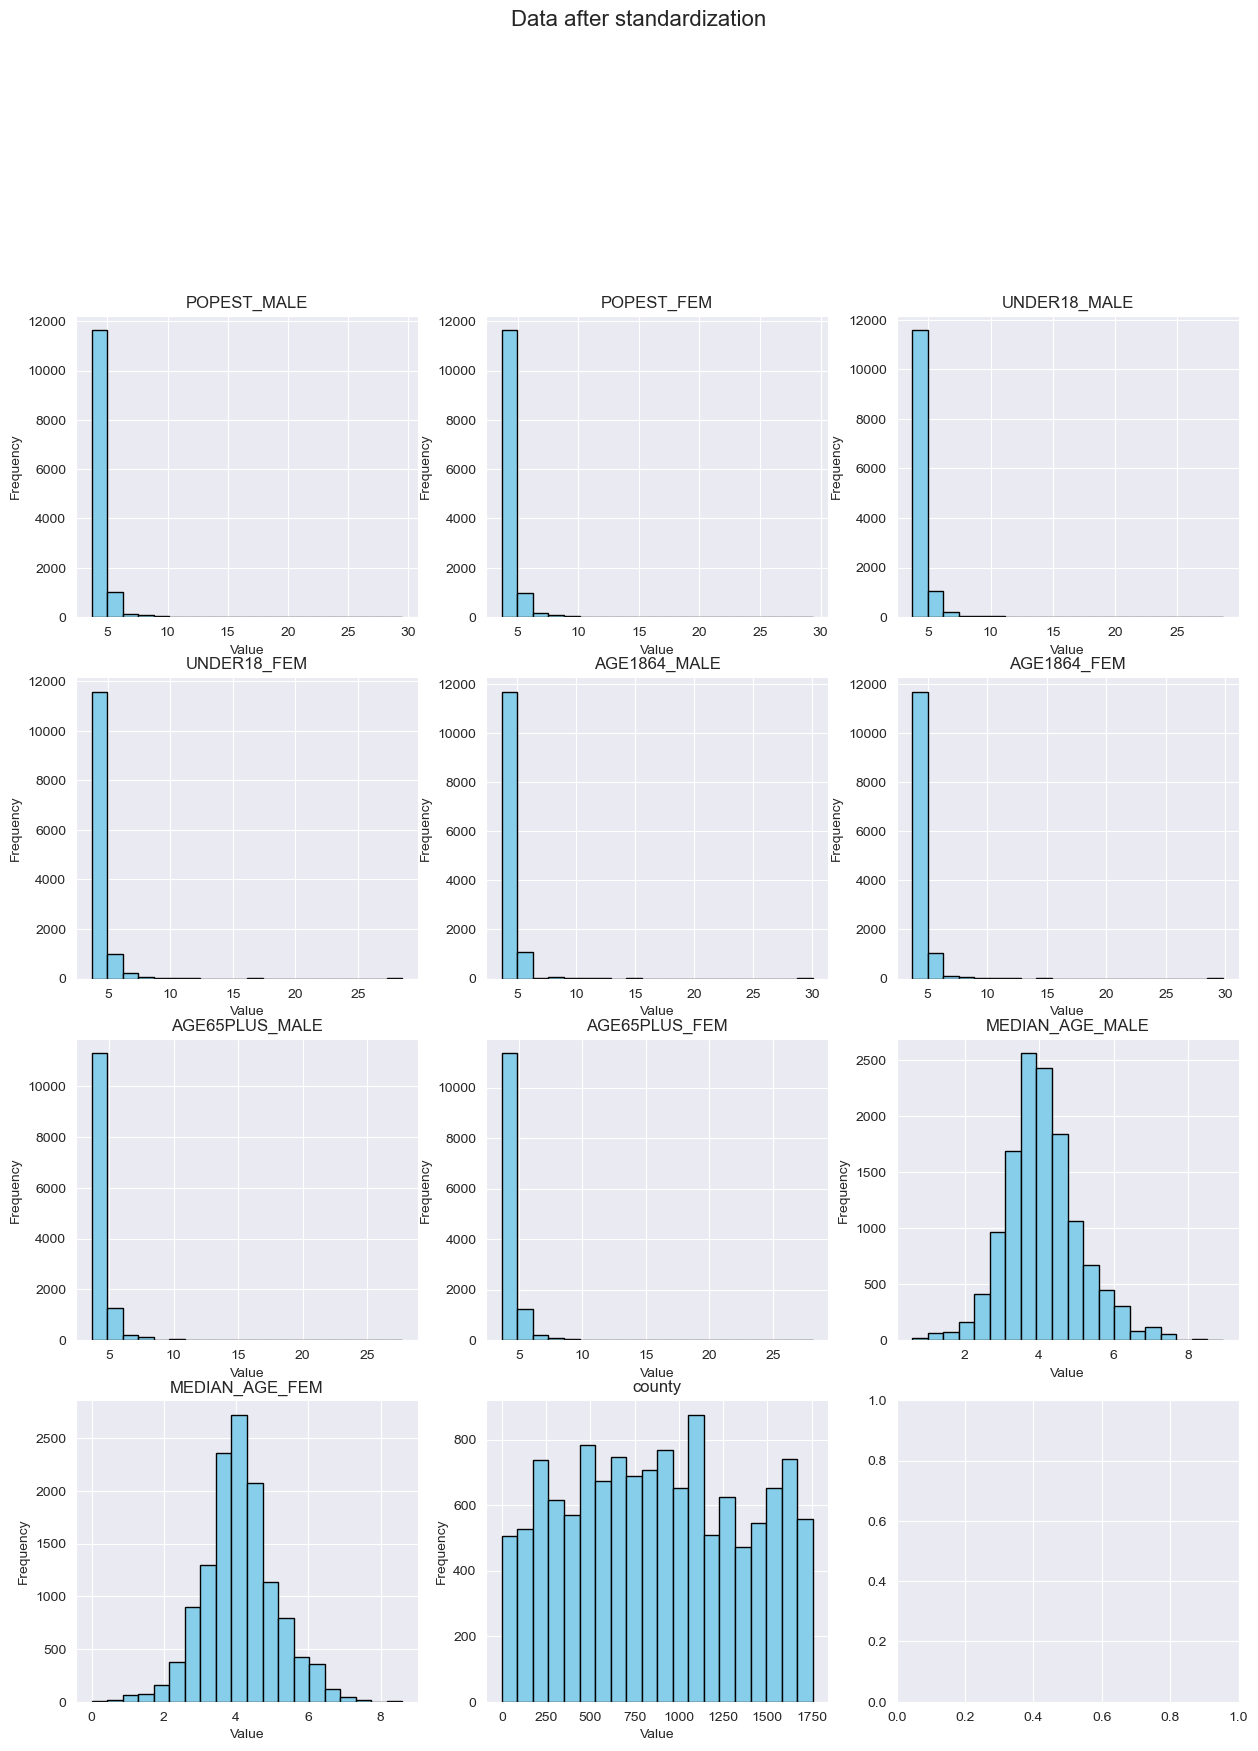

In [24]:
tdf_x = pd.DataFrame(df_x, columns=df_x_cols)
temp = pd.concat([tdf_x, df_y])

temp = temp.drop(columns=['state'])

cols_to_drop = temp.columns[(temp.nunique() < 10)]
temp = temp.drop(columns=cols_to_drop)


fig, axes = plt.subplots(nrows=int(np.ceil(len(temp.columns) / 3)), ncols=3, figsize=(15, 18))

axes = axes.flatten()
for i, col in enumerate(temp.columns):
    axes[i].hist(temp[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.suptitle('Data after standardization', y=1.05, fontsize=16)


plt.savefig('graph/after_standard.png')
plt.show()

The two graphs above show histograms for the columns of the dataframe before and after the standardization process. To this end we did not categorical columns, columns with less than 10 unique points to make graphs easier to understand. 

We can immediately notice that the graphs from before the standardization process and after it seem almost the same. This proves that even though the values of the data points were changed during standardization, it still managed to preserve its qualities.

Regarding the graphs themselves, we can see that most of the histograms are skewed to the left. The population estimates seem to be heavily left leaning, hinting that most counties are not very populated. The age distributions on the other hand seem to be centered, suggesting a normalized distribution of ages. The counties graph seem to be the most even, which shows that we have ample exaples from each county no matter the feature.  

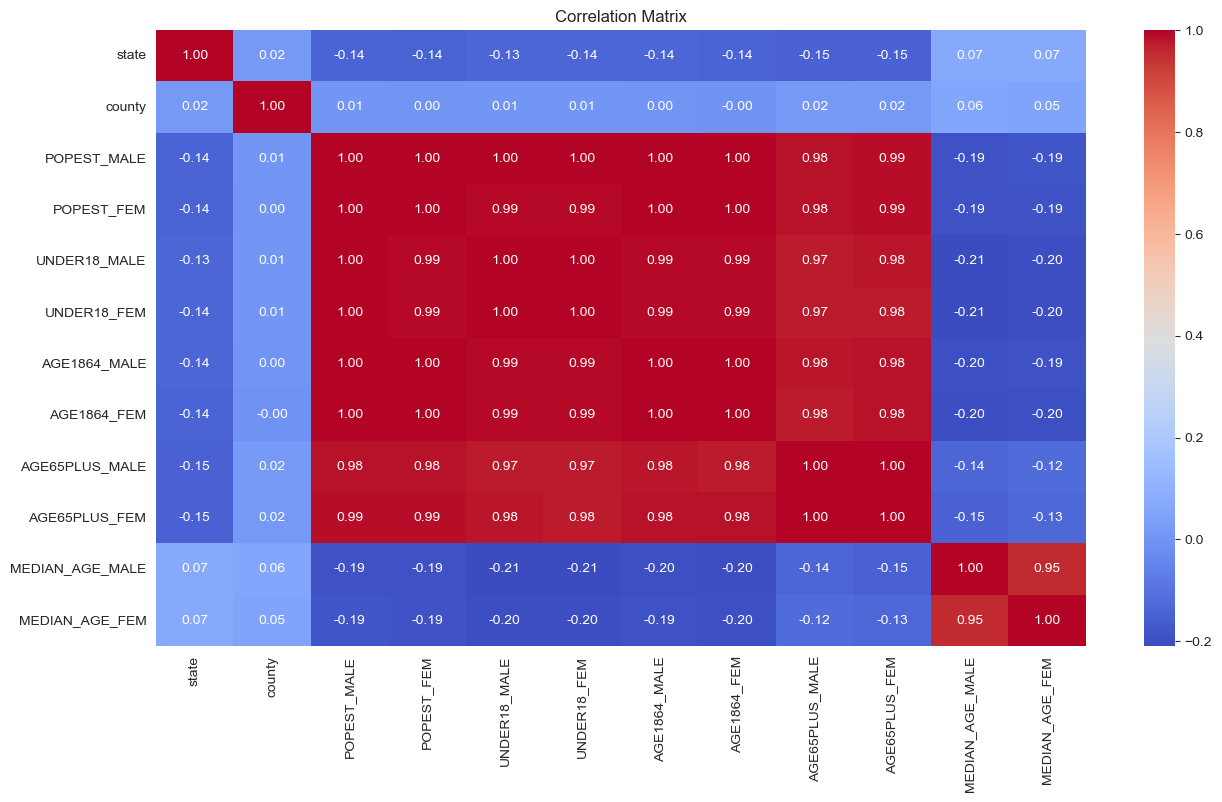

In [25]:
fig = plt.figure(figsize=(15, 8))
temp = df.copy()

correlation_matrix = temp.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

plt.savefig('graph/cor.png')
plt.show()

The correlation matrix above shows us how each feature is linked to one another. From the outset, We can see a very high correlation for our population estimates and age distribution. While these might seem off, we hava to remember that the population estimates are for each county and as such come in pairs for each county. This results in them being very hightly linked as most counties population estimates are unique and, as such, result in highly correlated pairs. 

Most significantly, we can see no clear correlation between the state and other features, signaling the fact that we need all the features we can get to conjure an accurate prediction for the best state.

### 3.2 Model development and training 

In [26]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#### 3.2.1 Logistic Regression

In [27]:
logreg_classifier = LogisticRegression(multi_class='multinomial')
logreg_classifier.fit(x_train_s, y_train_s['state'])
logreg_pred =  logreg_classifier.predict(x_test_s)

C:\Users\riasa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We use Multonomial logistic regression model for the  prediction of states.

#### 3.2.2  Classifier


In [28]:
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')
svm_classifier.fit(x_train_s, y_train_s['state'])
svm_pred = svm_classifier.predict(x_test_s)

In [29]:
svm_classifier = SVC(kernel='linear', decision_function_shape='ovo')
svm_classifier.fit(x_train_s, y_train_s['state'])
svm_pred_ova = svm_classifier.predict(x_test_s)

We use Multonomial logistic regression model for the  prediction of states. We use both the one-vs-all and one-vs-one strategies.

#### 3.2.3 Naive Bayes Classifier


In [30]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_s, y_train_s['state'])
nb_pred = nb_classifier.predict(x_test_s)

We use Multonomial Naive Bayes model for the  prediction of states.

#### 3.2.4 Custom Neural Network

In [31]:
class Net(nn.Module):
    def __init__(self, os):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.elu1 = nn.ELU()
        self.fc2 = nn.Linear(32, 64)
        self.elu2 = nn.ELU()
        self.fc3 = nn.Linear(64, 128)
        self.elu3 = nn.ELU()
        self.fc4 = nn.Linear(128, 256)
        self.elu4 = nn.ELU()
        self.fc7 = nn.Linear(256, os)

    def forward(self, x):
        x = self.fc1(x)
        x = self.elu1(x)
        x = self.fc2(x)
        x = self.elu2(x)
        x = self.fc3(x)
        x = self.elu3(x)
        x = self.fc4(x)
        x = self.elu4(x)
        x = self.fc7(x)
        return x

In [32]:
model_s = Net(n_states)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_s.parameters(), lr=0.0001)

train_acc = []
train_pre = []
train_rec = []
train_f1 = []
train_loss = []

epochs = 100

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_s = model_s.to(device)

for epoch in range(epochs):
    output1 = model_s(x_train_sr.to(device))
    total_loss = 0.00
    correct_predictions = 0
    total_samples = 0
    
    all_labels = []
    all_preds = []

    for batch_idx, (inputs, labels) in enumerate(data_loader_s, 1):
        model_s.train()
        inputs ,labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model_s(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()
        
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

        if batch_idx % 100 == 0 or batch_idx == len(data_loader_s):
            avg_l = total_loss / batch_idx
            avg_acc = correct_predictions/total_samples
            print('Epoch', epoch+1, '/', epochs, 'Batch', batch_idx, '/', len(data_loader_s), 'Loss', avg_l, 'Batch Accuracy', avg_acc)



    avg_e_loss = total_loss / len(data_loader_s)
    acc =  accuracy_score(all_labels, all_preds)
    
    train_acc.append(accuracy_score(all_labels, all_preds))
    train_pre.append(precision_score(all_labels, all_preds, average='macro', zero_division=0.0))
    train_rec.append(recall_score(all_labels, all_preds, average='macro' ,zero_division=0.0))
    train_f1.append(f1_score(all_labels, all_preds, average='macro',zero_division=0.0))
    train_loss.append(avg_e_loss)
    print('====================================================')
    print('Epoch', epoch+1, '/', epochs, 'Average Loss: ', avg_e_loss, 'Average Accuracy for Epoch', acc)
    print('====================================================')

Epoch 1 / 100 Batch 100 / 171 Loss 3.9334962034225462 Batch Accuracy 0.021372549019607844
Epoch 1 / 100 Batch 171 / 171 Loss 3.9288292921077437 Batch Accuracy 0.02396589468832815
Epoch 1 / 100 Average Loss:  3.9288292921077437 Average Accuracy for Epoch 0.02396589468832815
Epoch 2 / 100 Batch 100 / 171 Loss 3.9074544715881347 Batch Accuracy 0.03431372549019608
Epoch 2 / 100 Batch 171 / 171 Loss 3.8963672264277585 Batch Accuracy 0.03479663555709183
Epoch 2 / 100 Average Loss:  3.8963672264277585 Average Accuracy for Epoch 0.03479663555709183
Epoch 3 / 100 Batch 100 / 171 Loss 3.8529876613616945 Batch Accuracy 0.039411764705882354
Epoch 3 / 100 Batch 171 / 171 Loss 3.84170907561542 Batch Accuracy 0.0420555363521143
Epoch 3 / 100 Average Loss:  3.84170907561542 Average Accuracy for Epoch 0.0420555363521143
Epoch 4 / 100 Batch 100 / 171 Loss 3.811923885345459 Batch Accuracy 0.05137254901960785
Epoch 4 / 100 Batch 171 / 171 Loss 3.8011389378218623 Batch Accuracy 0.05519069017167876
Epoch 4 

For our custom neural network, we opted for a moderately complex network, with 3 hidden layers between the input and output layers. We used ELU activation function for these hidden layers to avoid the dying relu problem, which occurs when the relu activation function outputs only 0 for all inputs. We used Cross Entropy loss for multi classification. We also used Adam optimizer as it tends to be the most well rounded optimizer for neural networks. We train our model with a learning rate of 1X10^-3 for 100 epochs. This ensures that the model will be able to slowly learn the patterns hidden in the data without a high risk of overfitting on the training data.

### 3.3 Model evaluation

#### 3.3.1 Evaluation of Logistic Regression 


In [33]:
print("Logistic Regression Accuracy", accuracy_score(y_test_s['state'], logreg_pred))
print("Logistic Regression Precision", precision_score(y_test_s['state'], logreg_pred, average='macro'))
print("Logistic Regression  Recall", recall_score(y_test_s['state'], logreg_pred, average='macro'))
print("Logistic Regression F1 Score", f1_score(y_test_s['state'], logreg_pred, average='macro'))

Logistic Regression Accuracy 0.13707602339181288
Logistic Regression Precision 0.10926071134038365
Logistic Regression  Recall 0.1369905391875626
Logistic Regression F1 Score 0.1056204679853941


Here we see that our logistic regressor model gets low scores across the board. This might signal complex relationships between data and a relatively high amount of outliers in the data.

#### 3.3.2 Evaluation of  SVM Classifier


In [34]:
print("SVM Classifier Accuracy", accuracy_score(y_test_s['state'], svm_pred))
print("SVM Classifier Precision", precision_score(y_test_s['state'], svm_pred, average='macro'))
print("SVM Classifier Recall", recall_score(y_test_s['state'], svm_pred, average='macro'))
print("SVM Classifier F1 Score", f1_score(y_test_s['state'], svm_pred, average='macro'))

SVM Classifier Accuracy 0.15555555555555556
SVM Classifier Precision 0.17089258513855665
SVM Classifier Recall 0.15538062614604076
SVM Classifier F1 Score 0.1296804019030461


C:\Users\riasa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
print("SVM Classifier Accuracy", accuracy_score(y_test_s['state'], svm_pred_ova))
print("SVM Classifier Precision", precision_score(y_test_s['state'], svm_pred_ova, average='macro'))
print("SVM Classifier Recall", recall_score(y_test_s['state'], svm_pred_ova, average='macro'))
print("SVM Classifier F1 Score", f1_score(y_test_s['state'], svm_pred_ova, average='macro'))

SVM Classifier Accuracy 0.15555555555555556
SVM Classifier Precision 0.17089258513855665
SVM Classifier Recall 0.15538062614604076
SVM Classifier F1 Score 0.1296804019030461


C:\Users\riasa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Our SVM Model on the other hand, does very well with our data using both one vs all and one vs one stratagies. This might signify outliers in the data which SVM's are more resistant to. This also shows that the data is balanced with examples for all kinds of classes and its features contain the appropriate information for drawing a good decision boundary. 

#### 3.3.3 Evaluation of Naive Bayes Classifier

In [36]:
print("Naive Bayes Accuracy", accuracy_score(y_test_s['state'], nb_pred))
print("Naive Bayes Precision", precision_score(y_test_s['state'], nb_pred, average='macro'))
print("Naive Bayes Recall", recall_score(y_test_s['state'], nb_pred, average='macro'))
print("Naive Bayes F1 Score", f1_score(y_test_s['state'], nb_pred, average='macro'))

Naive Bayes Accuracy 0.07345029239766082
Naive Bayes Precision 0.09457615536422115
Naive Bayes Recall 0.07344222829694126
Naive Bayes F1 Score 0.04794077727739277


C:\Users\riasa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Our Naive Bayes Model performs the worst so far, with it not being able to cross the 50% threshold. This might indicate that the datapoints are not conditionally independent, leading to many wrong predictions by the model.

#### 3.3.4 Evaluation of  Custom Neural Network

In [37]:
test_db_s = TensorDataset(x_test_sr, y_test_sr)
data_loader_test_s = DataLoader(test_db_s, batch_size=n_states, shuffle=False)

In [38]:
model_s.eval()
total_loss = 0.0

nn_pred = []
nn_true = []

test_acc = []
test_pre = []
test_rec = []
test_f1 = []


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_s.to(device)


with torch.no_grad():
    for inputs, labels in data_loader_test_s:
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model_s(inputs)
        nn_pred.extend(torch.argmax(outputs, dim=1).cpu().numpy())
        nn_true.extend(labels.cpu().numpy())

test_acc.append(accuracy_score(nn_true, nn_pred))
test_pre.append(precision_score(nn_true, nn_pred, average='macro', zero_division=0.0))
test_rec.append(recall_score(nn_true, nn_pred, average='macro' ,zero_division=0.0))
test_f1.append(f1_score(nn_true, nn_pred, average='macro',zero_division=0.0))

In [39]:
classes = label_s

print("Average Testing Accuracy ", test_acc[0])
print("Latest Training Accuracy ", train_acc[-1])
print('===================================================================')
print("Average Testing Precision ", test_pre[0])
print("Latest Training Precision ", train_pre[-1])
print('===================================================================')
print("Average Testing Recall ",test_rec[0])
print("Latest Training Recall ", train_rec[-1])
print('===================================================================')
print("Average Testing F1 Score",test_f1[0])
print("Latest Training F1 Score ", train_f1[-1])
print('===================================================================')

Average Testing Accuracy  0.19391812865497077
Latest Training Accuracy  0.19633598340822675
Average Testing Precision  0.16348334860506106
Latest Training Precision  0.1785039741609903
Average Testing Recall  0.19374697670232752
Latest Training Recall  0.19643659321313664
Average Testing F1 Score 0.15724126720420797
Latest Training F1 Score  0.16043936925351993


Here for our custom neural network, we can see very scores . This accuracy shows that most its its predictions are correct, signifying its overall performance. The  precision and recall show that the model is better at minimizing false positives while being good at predicting actually positive instances of each class than some other models. The F1 score also confirms that the model also has a good balance of its precision and recall scores. 

The training scores being very close to actual test scores also signify that the model has not been overfitted to the training data even with the large number of epochs.

### 3.4 Analysis 

#### 3.4.1 Analysis of Logistic Regression

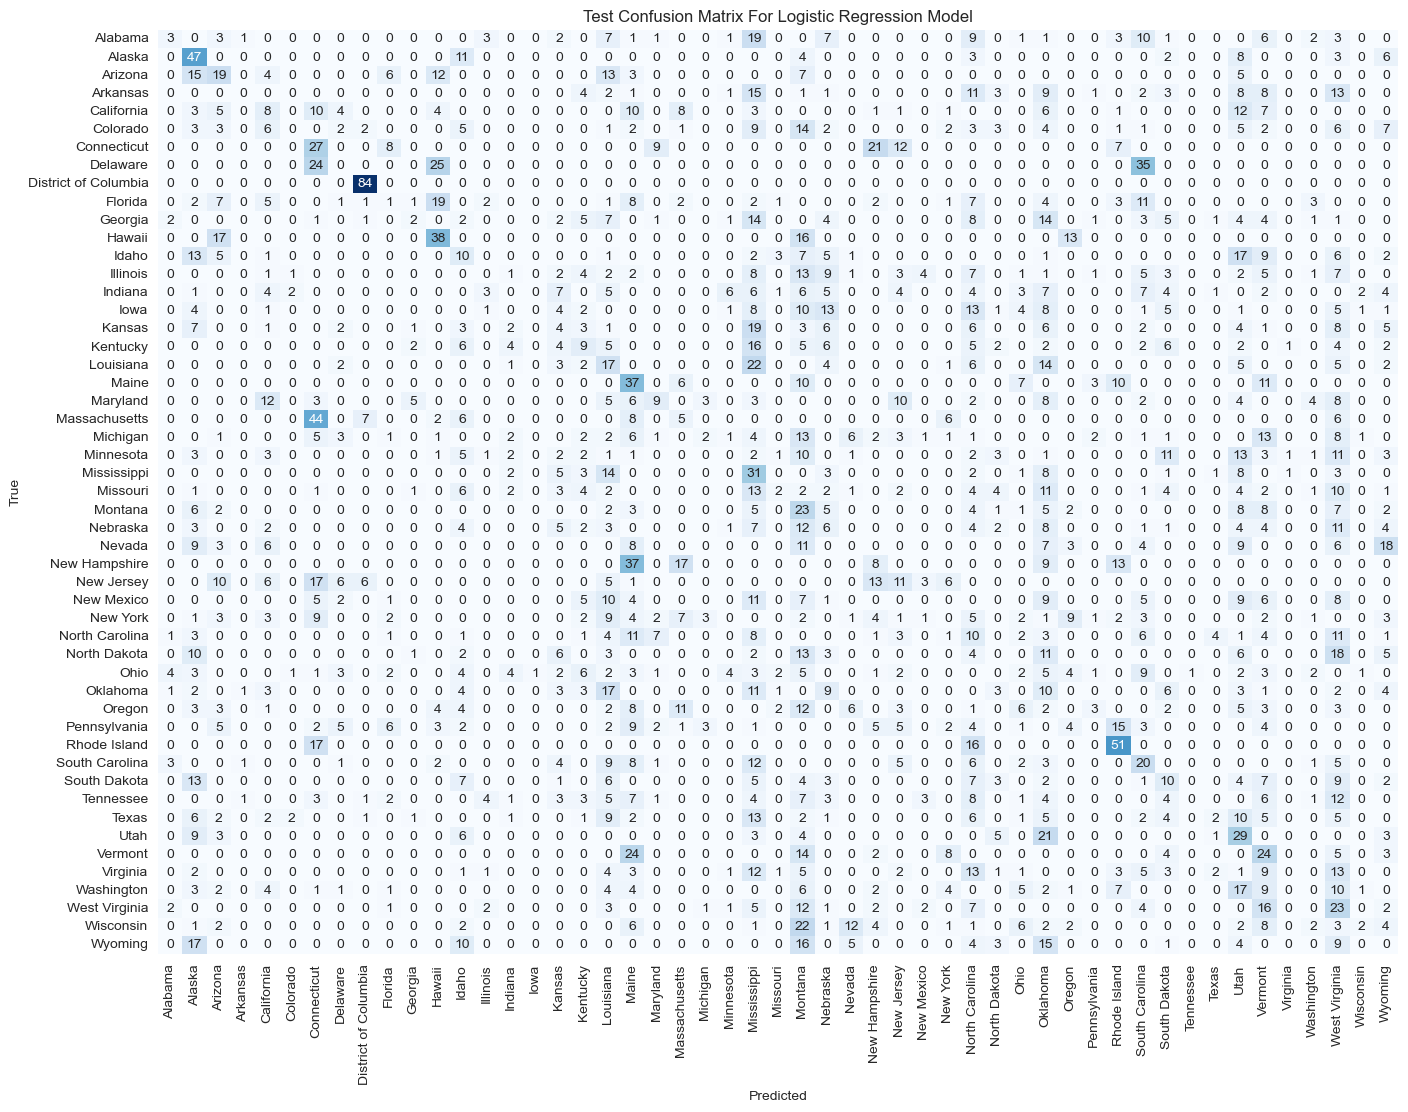

In [40]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(y_test_s['state'], logreg_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For Logistic Regression Model')

plt.savefig('graph/cm_logistic.png')
plt.show()

Looking at the confusion matrix of the logistic regression model, we can see that it makes a lot of correct predictions as evidenced by the diagonal line for all true positive instances. But as evidenced by the number of predictions outside the diagonal line, the model also has a lot of false positive and negative instances. The number of correct and incorrect predictions seems to be almost even, with more correct predictions.  

#### 3.4.2 Analysis of SVM Classifier

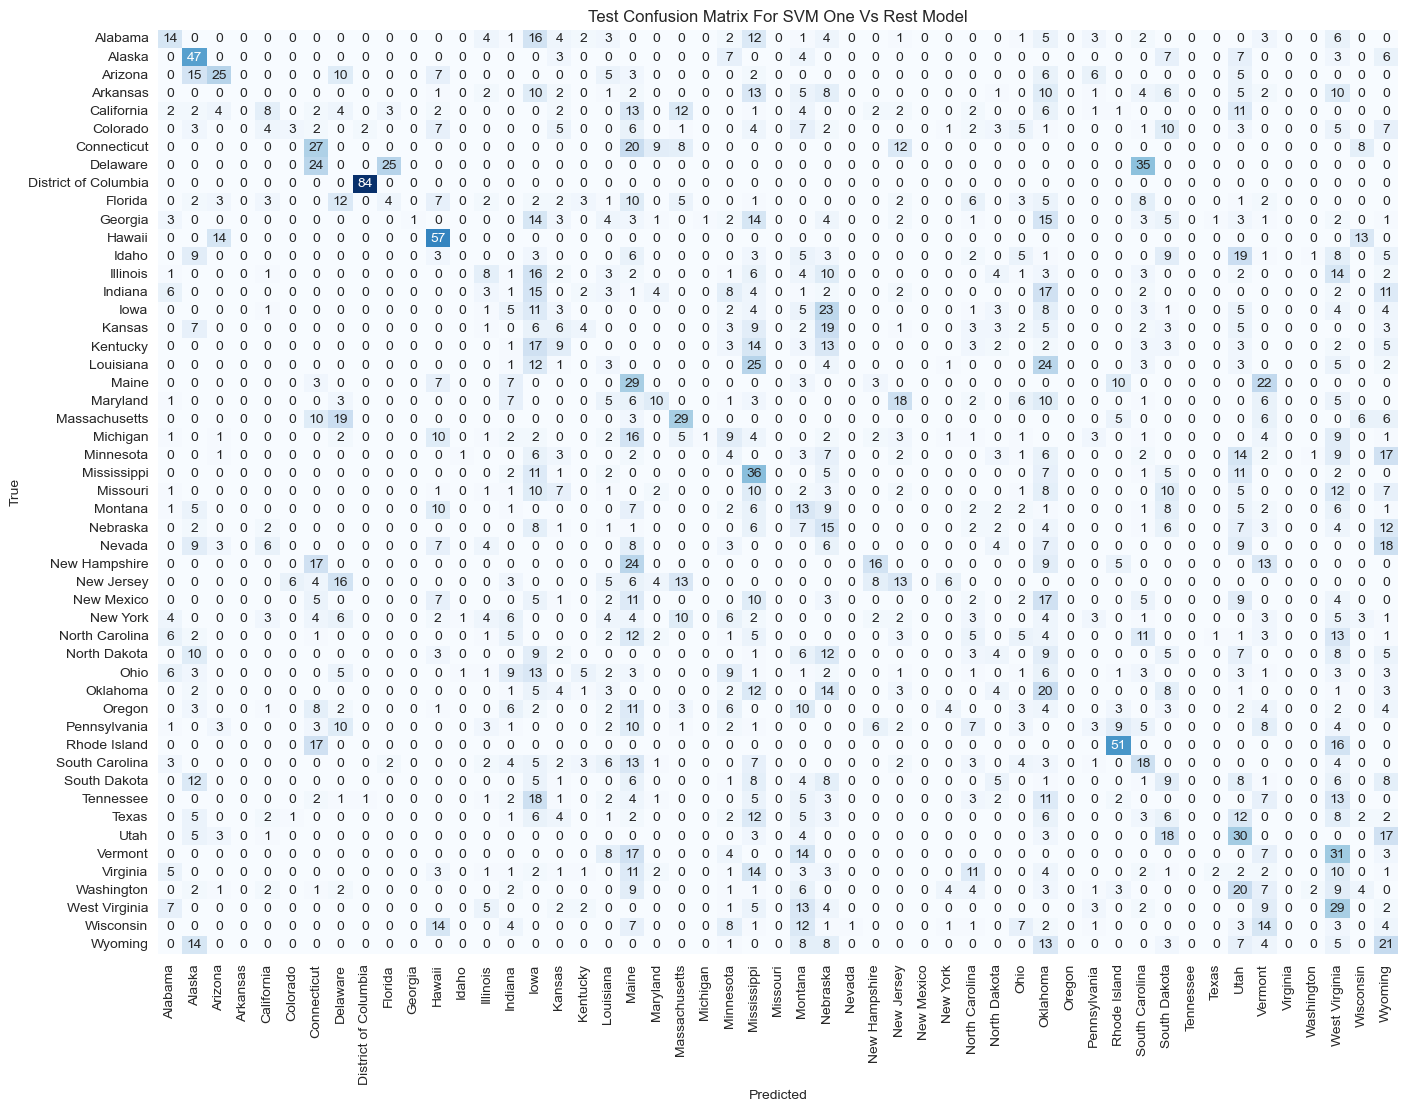

In [41]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(y_test_s['state'], svm_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For SVM One Vs Rest Model')
plt.savefig('graph/cm_svm_ovr.png')
plt.show()

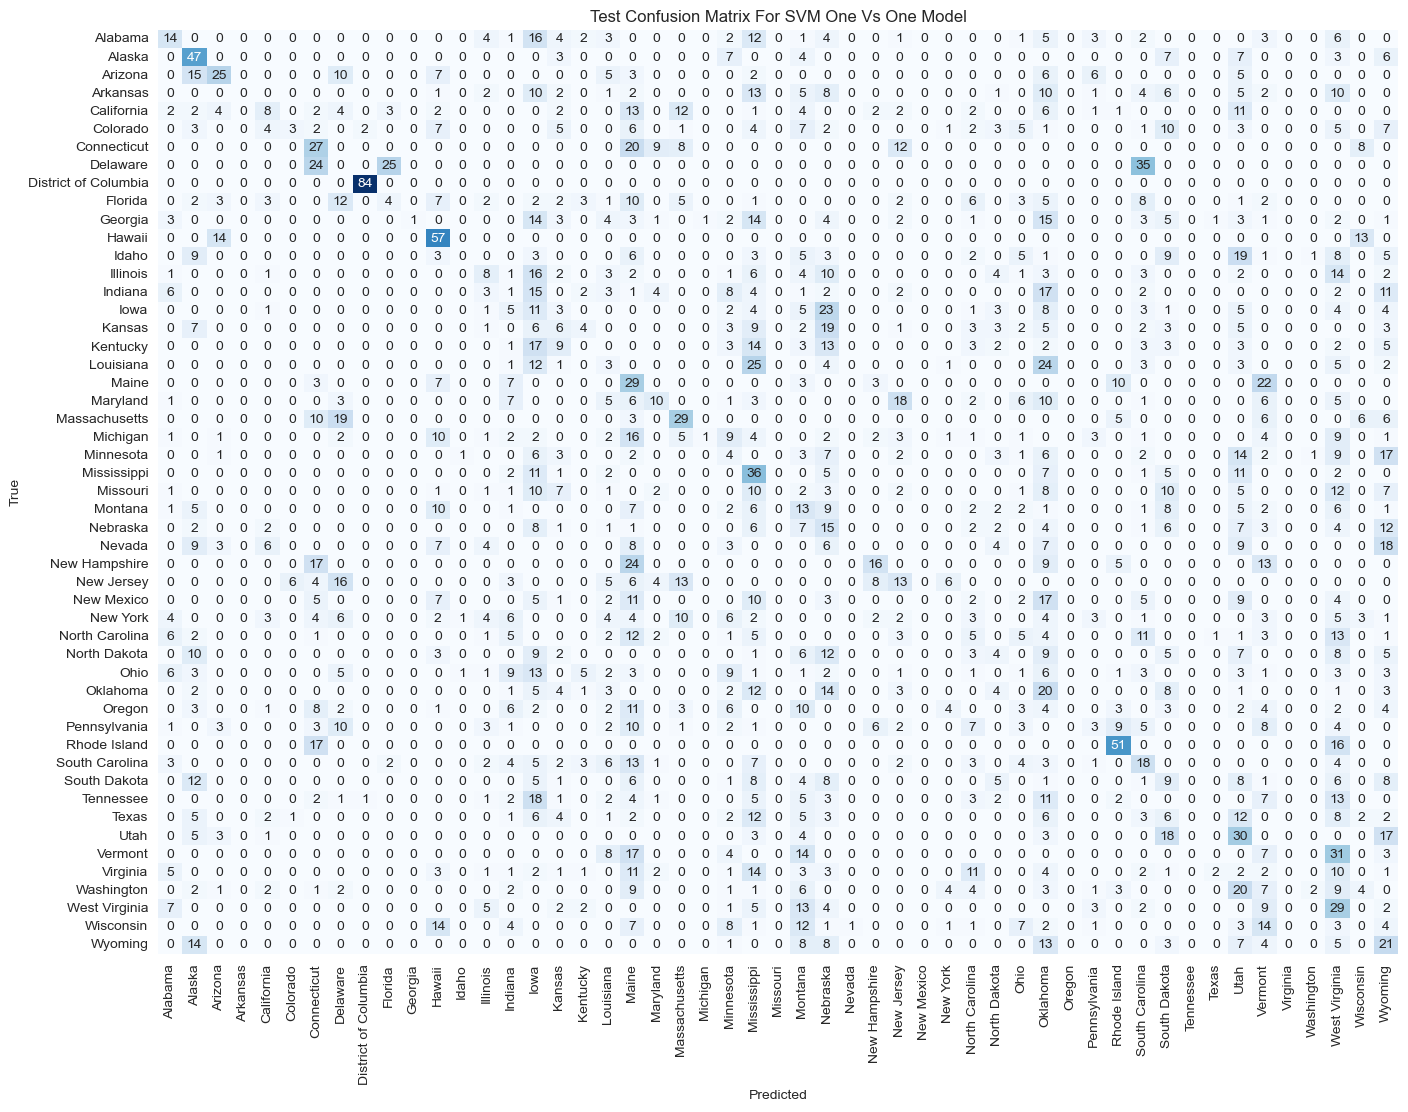

In [42]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(y_test_s['state'], svm_pred_ova), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For SVM One Vs One Model')
plt.savefig('graph/cm_ovo.png')
plt.show()

Now we see that for both SVM models, the confusion matrix is a lot cleaner than the Logistic Regression Model. The models' higher accuracy, precision, recall and f1 scores is evidenced by the more visible diagonal line going through the confusion matrix. Although better, These models still have some false negative and positive instances as shown by the number of predictions outside the diagonal line. Even with the higher scores, we can see that both models tend to falsely predict one or two states, particularly 'Maine' and 'Iowa'.

#### 3.4.3 Analysis of Naive Bayes

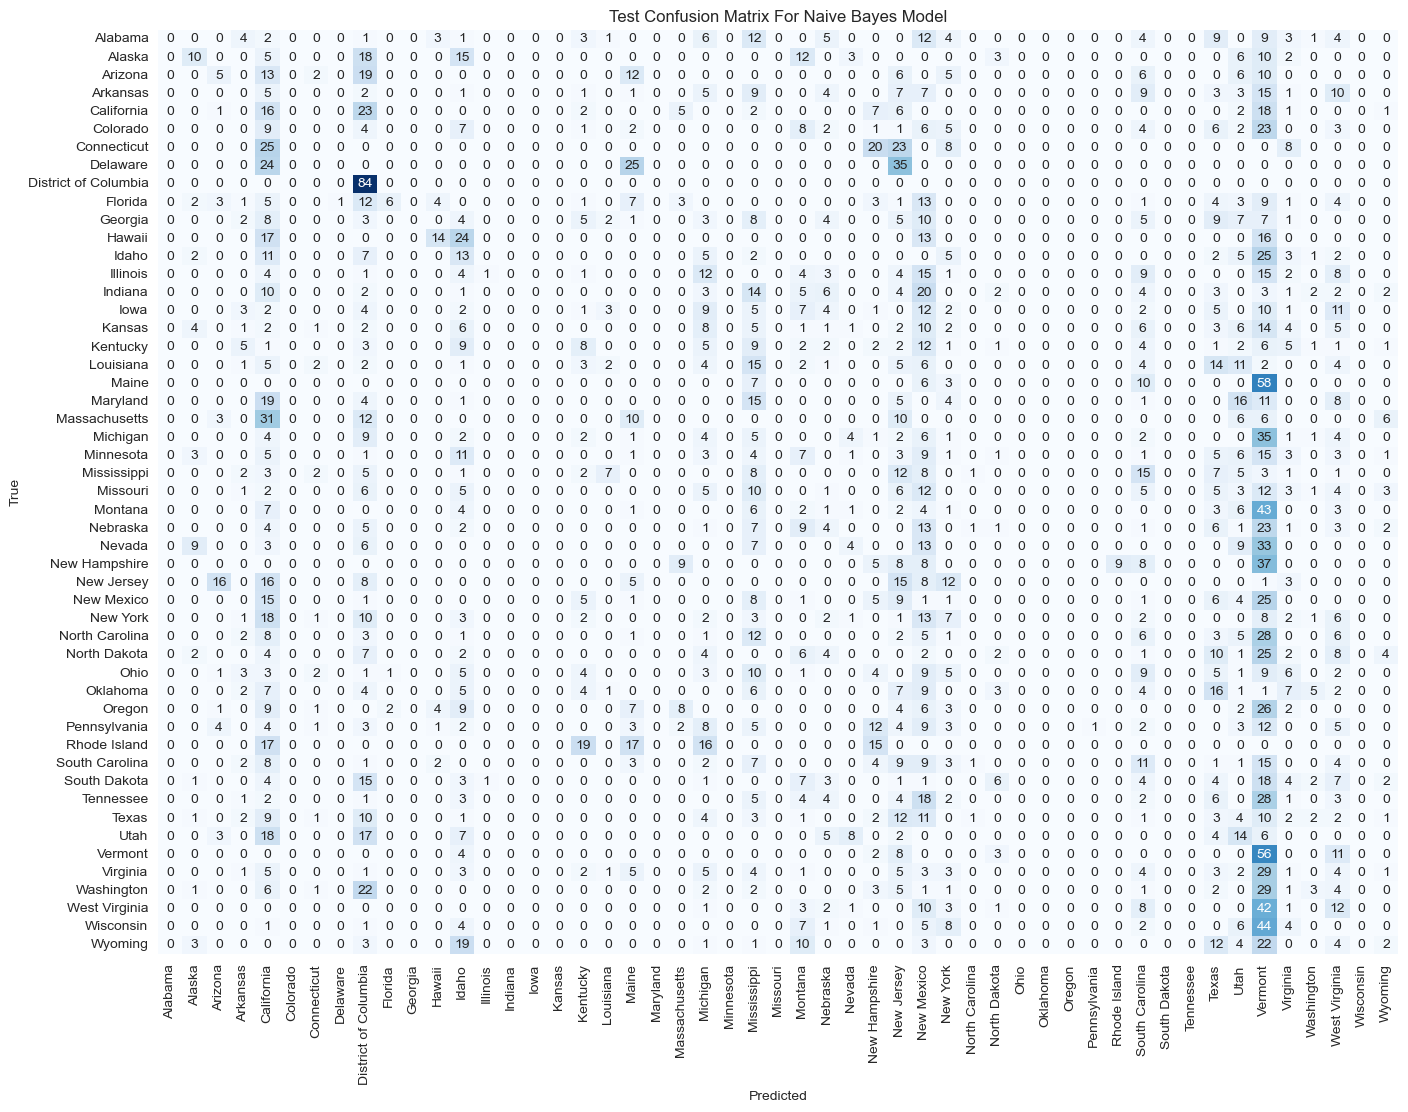

In [43]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(y_test_s['state'], nb_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For Naive Bayes Model')
plt.savefig('graph/cm_bayes.png')
plt.show()

The Naive Bayes is seems to be the worst model so far, as shown by its messy confusion model. Unlike other models, there is no clear diagonal line. Instead it seems that the diagonal is often broken in several points, where the model's predictions seem completely wrong. This shows that the Naive bayes model, while being good for some classes, completely breaks down for other classes. In particular, the model always seems to prefer the state of 'Maine' for all its predictions'.

#### 3.2.4 Analysis of Custom Neural Network

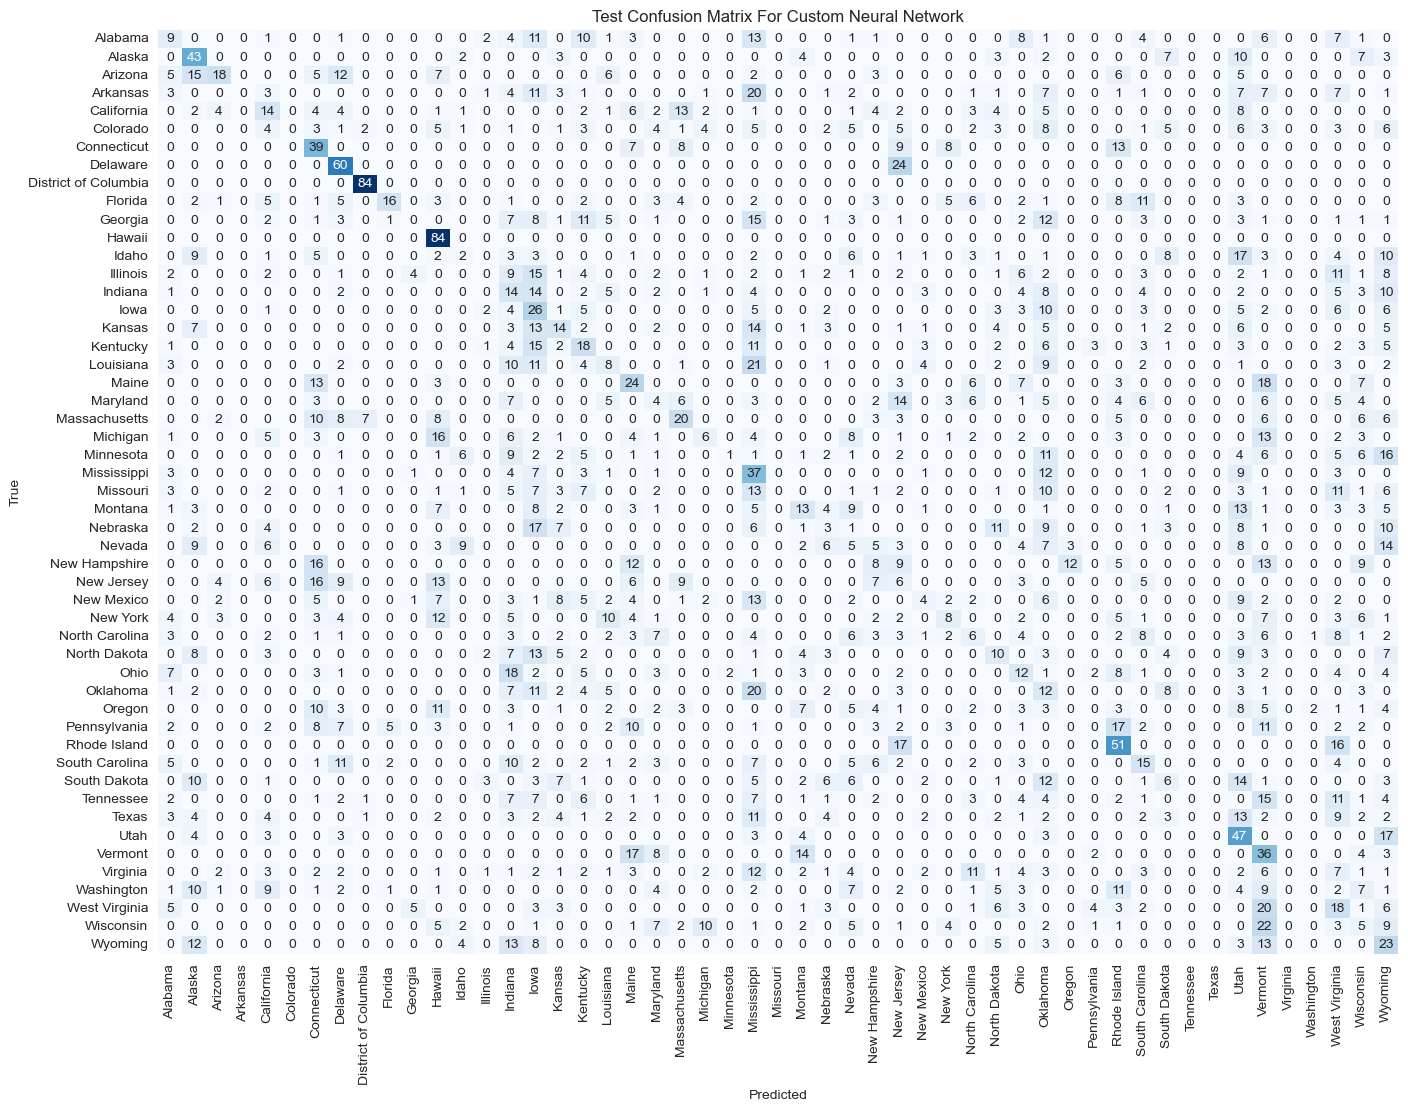

In [44]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(nn_true, nn_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For Custom Neural Network')
plt.savefig('graph/cm_test_nn.png')
plt.show()

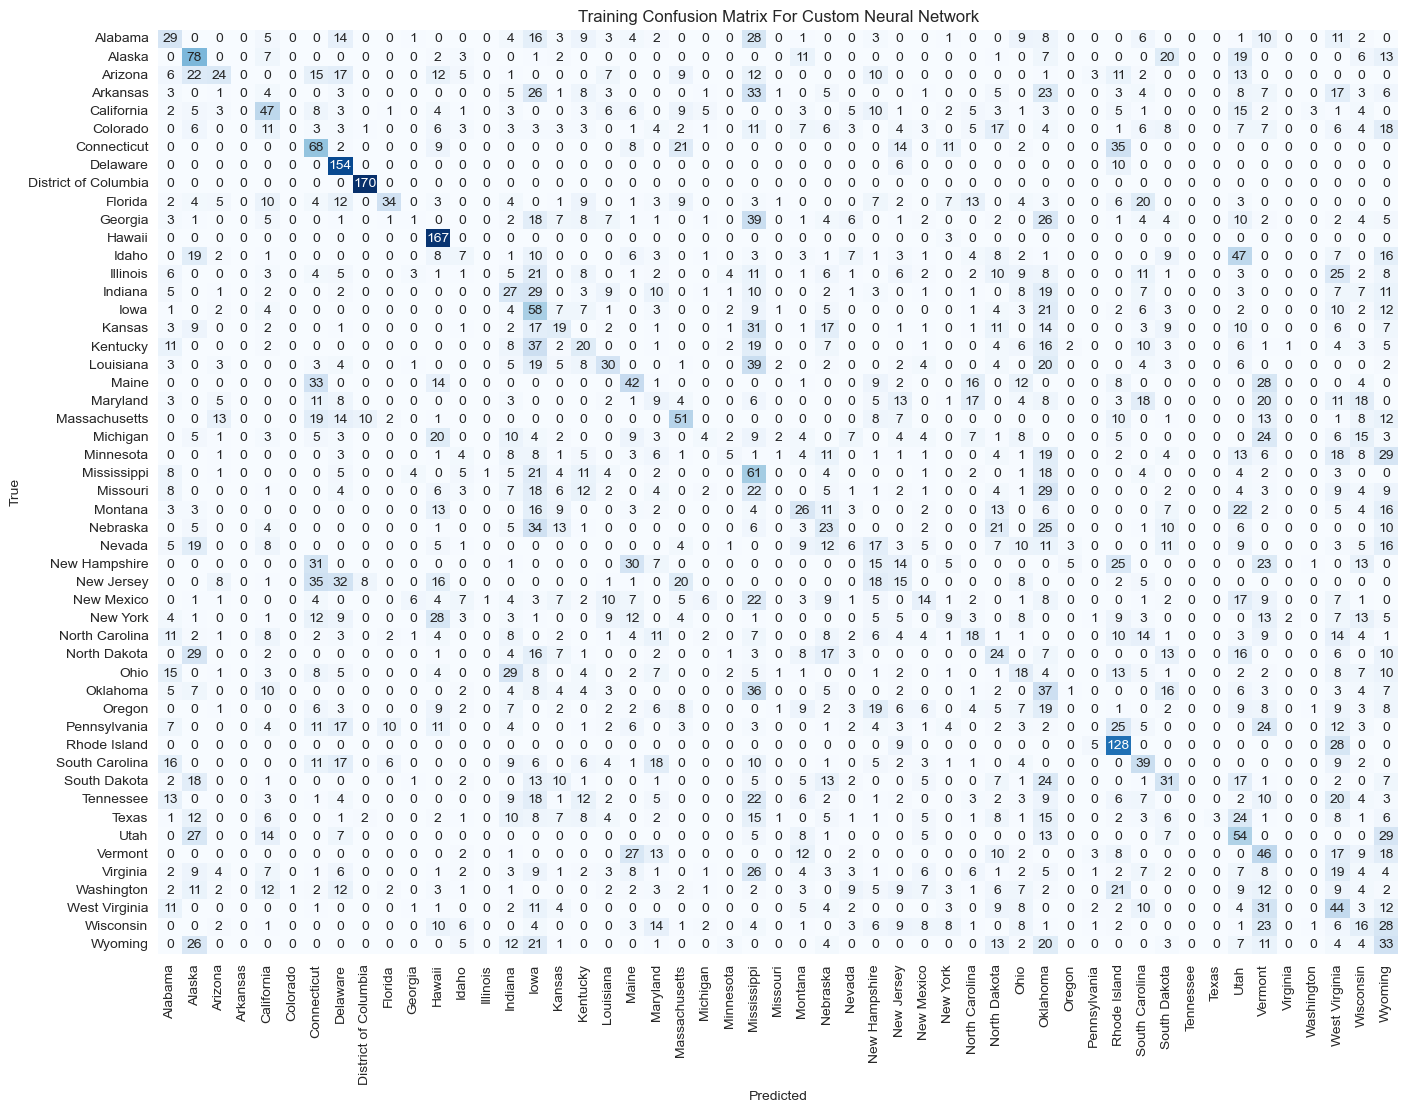

In [45]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(all_labels, all_preds), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Training Confusion Matrix For Custom Neural Network')
plt.savefig('graph/cm_train_nn.png')
plt.show()

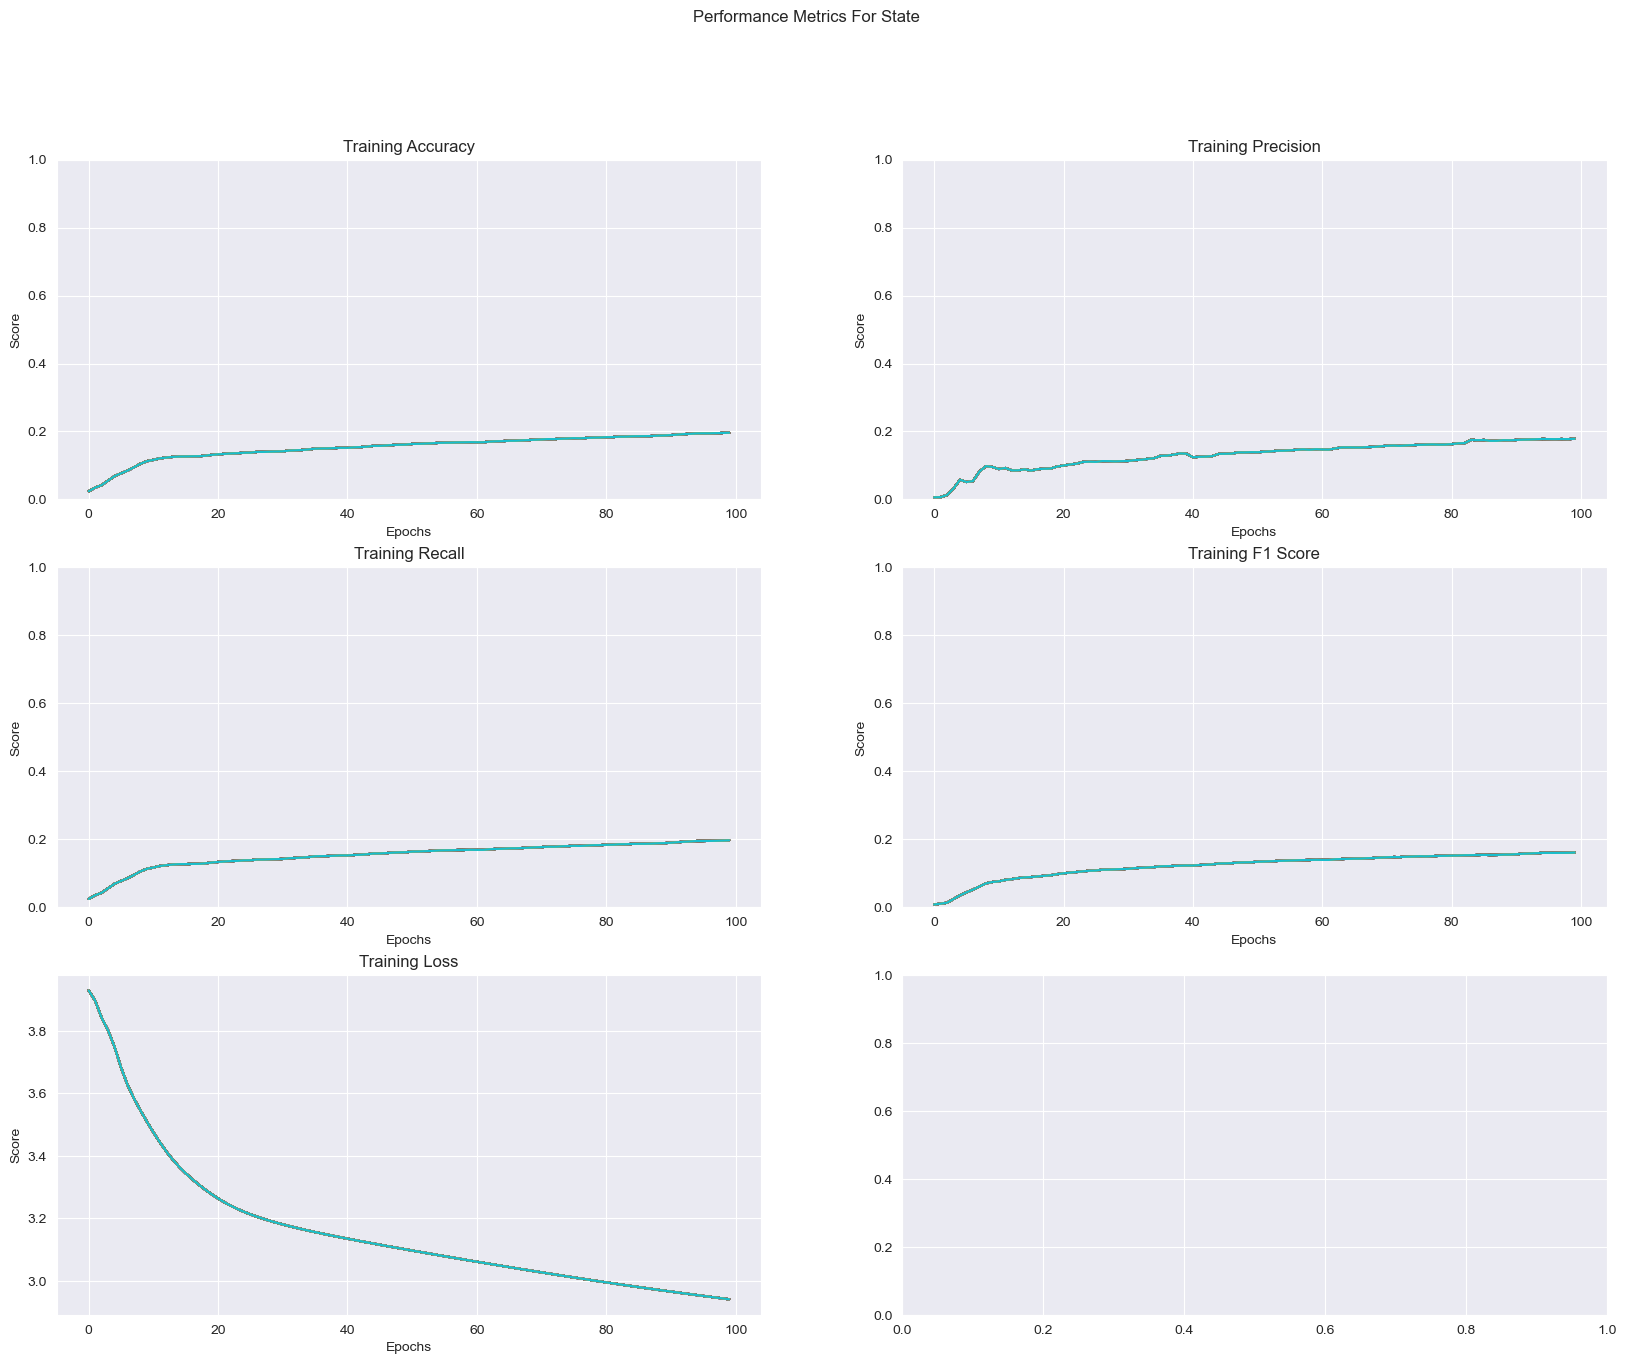

In [46]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Performance Metrics For State')

ep = range(epochs)

for e in ep:

    axs[0, 0].plot(ep, train_acc)
    axs[0, 0].set_title('Training Accuracy')
    axs[0, 0].set_xlabel('Epochs')
    axs[0, 0].set_ylabel('Score')
    axs[0, 0].set_ylim(0, 1)

    axs[0, 1].plot(ep, train_pre, label='Train')
    axs[0, 1].set_title('Training Precision')
    axs[0, 1].set_xlabel('Epochs')
    axs[0, 1].set_ylabel('Score')
    axs[0, 1].set_ylim(0, 1)


    axs[1, 0].plot(ep, train_rec, label='Train')
    axs[1, 0].set_title('Training Recall')
    axs[1, 0].set_xlabel('Epochs')
    axs[1, 0].set_ylabel('Score')
    axs[1, 0].set_ylim(0, 1)


    axs[1, 1].plot(ep, train_f1, label='Train')
    axs[1, 1].set_title('Training F1 Score')
    axs[1, 1].set_xlabel('Epochs')
    axs[1, 1].set_ylabel('Score')
    axs[1, 1].set_ylim(0, 1)


    axs[2, 0].plot(ep, train_loss, label='Train')
    axs[2, 0].set_title('Training Loss')
    axs[2, 0].set_xlabel('Epochs')
    axs[2, 0].set_ylabel('Score')


plt.show()

Finally, for our custom neural network, we can see one of  the cleanest confusion matrices so far out of all the models. Both the training and testing confusion matrices show similar diagonal lines through the confusion matrix. This pattern is shown for both the training and testing set, showing us that the model is not overfitted on the training data.  

Although the model makes  mistakes, as evidenced by the incorrect predictions outside the diagonal line, the mistakes are lower than other models. And unlike models , its mistakes are not spread out over several closely related classes. And while it can still mistake similar classes for one another, its mistakes are mostly for very similar classes, as shown by its predictions for 'Lousiana' and 'Maine' states which are right next to one another.  

We can also get a better feel for the neural networks training performance by the graphs of its  various scores and losses.

The Accuracy, Precision, Recall and F1 Scores all show similar graphs all throughout the training process. The scores  start out show which continues up until the end of 100 epochs, where it is able to achieve a respectable score of around10-15% This slow increase shows that the model learns slowly but surely. This is further evidenced by the small differences in the training and testing scores, which disproves any notion of the model overfitting.

The depicted loss graph shows a discernible pattern: a rapid decline in loss scores within the initial five epochs, followed by a gradual reduction until the model's training concludes. Particularly, the loss graph exhibits a symmetrical correspondence with other metric graphs, showing a linear correlation among accuracy, precision, recall, F1 score, and the loss function throughout the training phase.